# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Importing numpy and pandas **

In [24]:
import numpy as np
import pandas as pd

** Importing visualization libraries. **

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Reading in the csv file to a dataframe called df **

In [26]:
df=pd.read_csv('911.csv')

** Checking the info() of the df **

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


** Checking the head of df **

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,10


## Data Analysis

** What are the top 5 zipcodes for 911 calls? **

In [29]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [30]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

** How many unique title codes are there? **

In [31]:
df['title'].nunique()

148

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [32]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [33]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire


** What is the most common Reason for a 911 call based off of this new column? **

In [34]:
df['Reason'].value_counts()# From value_counts() function we can get to that EMS is the most common reason for 911 calls.

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

** Using seaborn to create a countplot of 911 calls by Reason. **

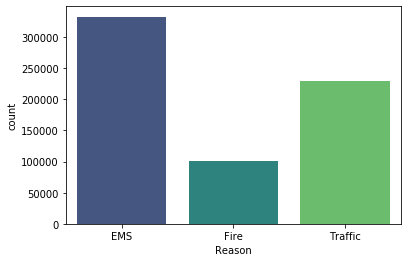

In [35]:
sns.countplot(x='Reason',data=df,palette='viridis')

** Using [pd.to_datetime]to convert the column 'timeStamp' from strings to DateTime objects. **

In [36]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Now that the timestamp column are actually DateTime objects, I have created 3 new columns called Hour, Month, and Day of Week. **

In [46]:
df['Hour'] = df['timeStamp'].dt.hour
df['month'] = df['timeStamp'].dt.month
df['Day of Week']=df['timeStamp'].dt.day

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

**Now do the same for Month:**

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

** Now create a HeatMap using this new DataFrame. **

** Now create a clustermap using this DataFrame. **

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

**Continue exploring the Data however you see fit!**
# Great Job!